<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 &ndash; Running Your First Notebooks, Tabular Data</h2>

<b>Authors:</b> Brandstetter, Schäfl, Schörgenhumer<br>
<b>Date:</b> 10-10-2022

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which might require small code modifications. Most/All of the used functions are imported from the file <code>u1_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u1_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u1_utils as u1

# Import additional utilities needed in this notebook.
import numpy as np
import seaborn as sns

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u1.setup_jupyter()

<h3 style="color:rgb(0,120,170)">Module versions</h3>

As mentioned in the introductory slides, specific minimum versions of Python itself as well as of used modules are recommended.

In [2]:
u1.check_module_versions()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.21.5 (✓)
Installed pandas version: 1.4.2 (✓)
Installed scikit-learn version: 1.0.2 (✓)
Installed matplotlib version: 3.5.1 (✓)
Installed seaborn version: 0.11.2 (✓)


<h2> Tabular data</h2>

We will start with a data set composed of various measurements of different <i>wine</i> attributes (e.g. the <i>alcohol concentration</i>). The data set distinguishes <i>three</i> different classes, one for each cultivator. It was published/donored by <i>S. Aeberhard</i> and originally gathered by:

<cite>Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.</cite>

Currently, it is maintained by the UCI Machine Learning Repository:

<cite>Lichman, M. (2013). [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). Irvine, CA: University of California, School of Information and Computer Science.</cite>

In [10]:
wine_data = u1.load_wine()

Below you can see a table with all 178 samples (we start to count at 0). Tabular data can have columns in various data types. In our case the thirteen features are given in floating point numbers (recall <i>primitive data types</i>). We would refer to the cultivator as a <i>label</i> or <i>target</i> rather than a feature, because we want to predict the cultivator using all other features.

Summarizing, the popular wine data set contains results of a chemical analysis for $n=178$ different wines from three different classes, namely:

- Cultivator 0 ($n_{c0}=59$)
- Cultivator 1 ($n_{c1}=71$)
- Cultivator 2 ($n_{c2}=48$).

Moreover, we have the following $d=13$ features:

- alcohol
- malic acid
- ash
- alcalinity of ash  
- magnesium
- total phenols
- flavanoids
- nonflavanoid phenols
- proanthocyanins
- color intensity
- hue
- OD280/OD315 of diluted wines
- proline  

In [4]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cultivator
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<h3 style="color:rgb(0,120,170)">Feature correlation plot</h3>

In machine learning, we consider a feature vector $\boldsymbol{x}$ as input to the machine learning algorithm, and therefore as <i>input feature vector</i>. It is very important to get familiar with the input features. How do they correlate? Which ones have a good separation power?

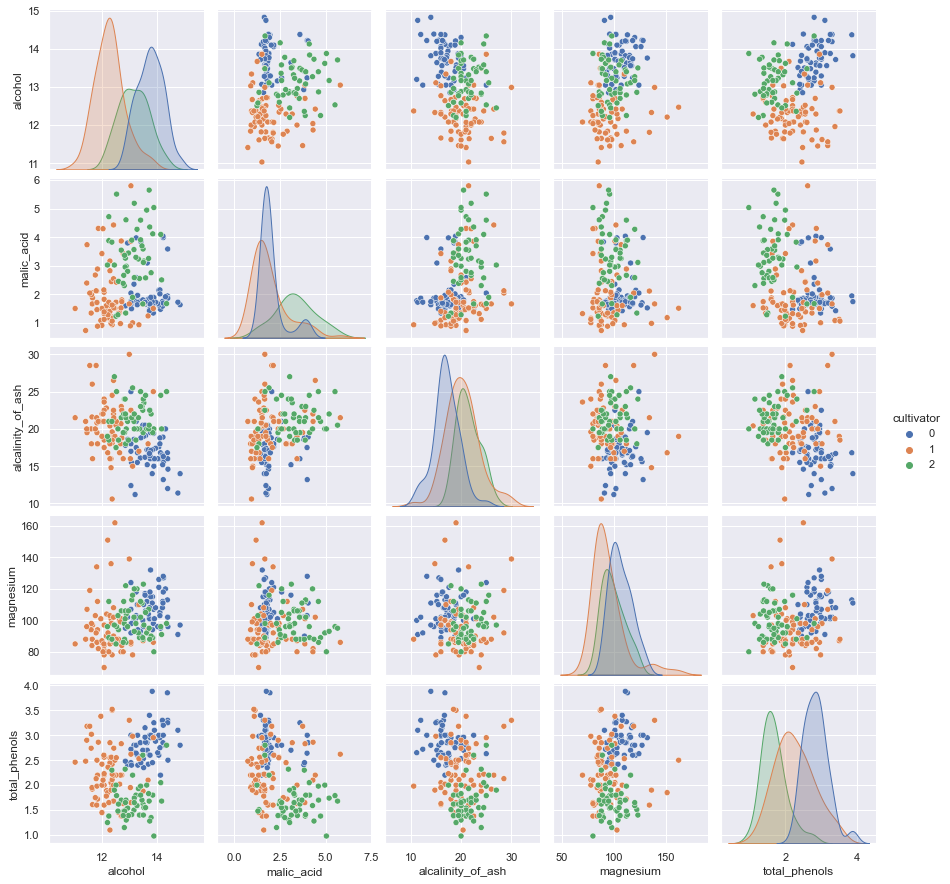

In [5]:
u1.plot_features(data=wine_data, features=["alcohol", "malic_acid", "alcalinity_of_ash", "magnesium", "total_phenols"], target_column="cultivator")

<h3 style="color:rgb(0,120,170)">Dimensionality reduction</h3>

If we could plot the samples of the table as datapoints, we would probably see, that samples from the same cultivator form a so called <i>cluster</i>, as they are closer to each other in space than samples from different cultivators. 
A way of visualizing clusters would be a plot where every sample is displayed as a dot. Since we have thirteen features, we would need a thirteen dimensional space (one coordinate for every feature) to represent every sample as a dot. This makes it impossible to plot the samples directly.<br>

Often, data is described with hundreds or thousands of features and therefore the visualization of those features is a very common problem. To overcome this problem, several <i>dimensionality reduction</i> techniques exist. We will apply one of the basic techniques to our data: the <i>Principal Component Ananlysis</i> or <i>PCA</i> in short. In the course of your study, you will learn more about this method. For now, it is not important what exactly is going on behind the scenes. All you need to know is that we need the number of dimensions to which we want to reduce the data. In our case, we choose the dimension $d=2$, so we can represent every sample as a dot in 2 dimensions.

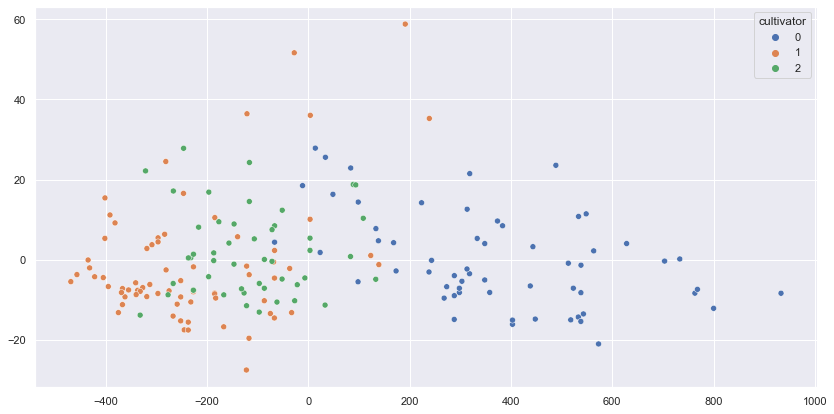

In [17]:
# this PCA implementation incorporates randomness, so we set the seed for the global random number generator to get reproducible results
np.random.seed(seed=42)
wine_data_pca = u1.apply_pca(n_components=2, data=wine_data, target_column="cultivator")
u1.plot_points_2d(data=wine_data_pca, target_column="cultivator", figsize=(14, 7))

We can try a different down projection method. The next one we will use is called <i>t-SNE</i>. Again, for now, it is not important how the method exactly works. The key takeaway point is that such a down projection is not unique, i.e., different methods will yield different results. Even the same method will yield different results sometimes.

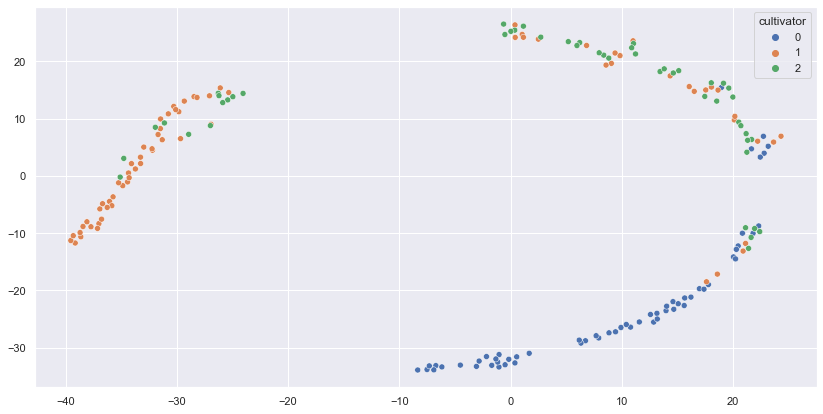

In [26]:
# this t-SNE implementation incorporates randomness, so we set the seed for the global random number generator to get reproducible results
np.random.seed(seed=42)
wine_data_tsne = u1.apply_tsne(n_components=2, data=wine_data, perplexity=10.0, target_column="cultivator")
u1.plot_points_2d(data=wine_data_tsne, target_column="cultivator", figsize=(14, 7))

<h3 style="color:rgb(0,120,170)">Clustering algorithms</h3>

Again, most times cultivator 0 is clearly seperated from cultivators 1 and 2. Or stated differently, the cultivator-0-dots <i>cluster</i> together in space. Imagine now that we have very high dimensional data with hundreds or thousands of features but no labels. It would be very interesting to find samples that form such a cluster. So lets pretend we don't know the labels. We will apply a clustering algorithm. As a demonstration, we will apply one of the best known algorithms, the <i>$k$-Means Clustering</i> algorithm. Here, $k$ is a parameter. It determines how many clusters the algorithm should search for. For example, if $k=3$, the algorithm will assume that there are three clusters and will try to cluster the data accordingly. There are other clustering algorithms where we do not need to specify the number of clusters - the algorithm will try to find out how many clusters there are.<br>

Now lets try the algorithm with $k=3$. The output of the algorithm is an assignment to a cluster for every data point. Again, we plot the down projected version of the dataset. But this time, we color the dots according to the assignment of the clustering algorithm, rather than the ground truth/true labels (which we pretended to not know). To compare the predicted clusters, we also plot the true labels directly below.<br>

Note that the predicted cluster values 0, 1 and 2 are just labels assigned by $k$-Means and are *not* the same as the original cultivator labels (which happen to be also 0, 1 and 2, but they could be something entirely different). This is because $k$-Means does not have any knowledge about the true labels. The implementation of this algorithm here simply names its $k$ clusters starting with 0.

PCA-plot with predicted clusters:
PCA-plot with true labels:


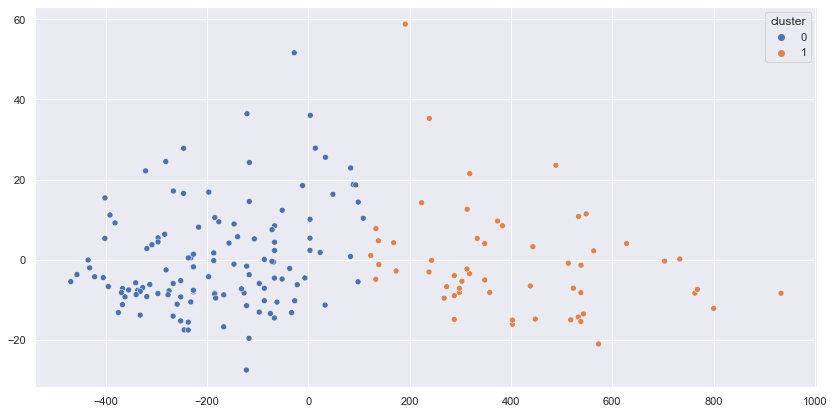

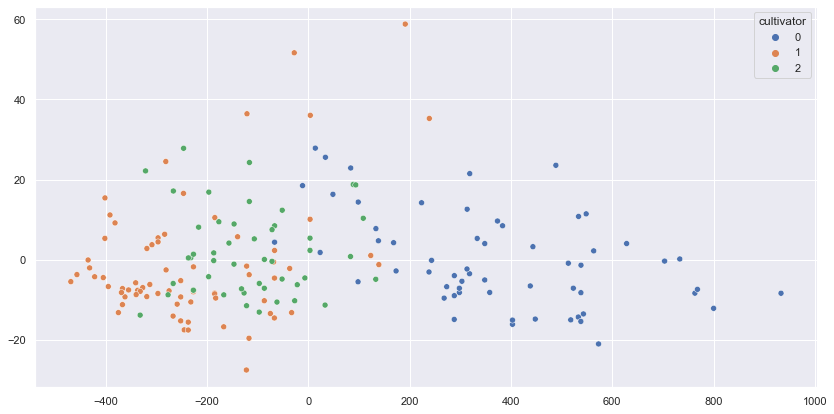

In [28]:
# this k-means implementation incorporates randomness, so we set the seed for the global random number generator to get reproducible results
np.random.seed(seed=42)
wine_data_k_means = wine_data_pca.copy()
wine_data_k_means = wine_data_k_means.rename(columns={"cultivator": "cluster"})
wine_data_k_means["cluster"] = u1.apply_k_means(k=2, data=wine_data.drop(columns="cultivator"))
print("PCA-plot with predicted clusters:")
u1.plot_points_2d(data=wine_data_k_means, target_column="cluster", figsize=(14, 7))
print("PCA-plot with true labels:")
u1.plot_points_2d(data=wine_data_pca, target_column="cultivator", figsize=(14, 7))

We will try another clustering algorithm, called <i>Affinity Propagation</i>. For this method, we don't need to specify the number of clusters. Let's see which and how many clusters we get.

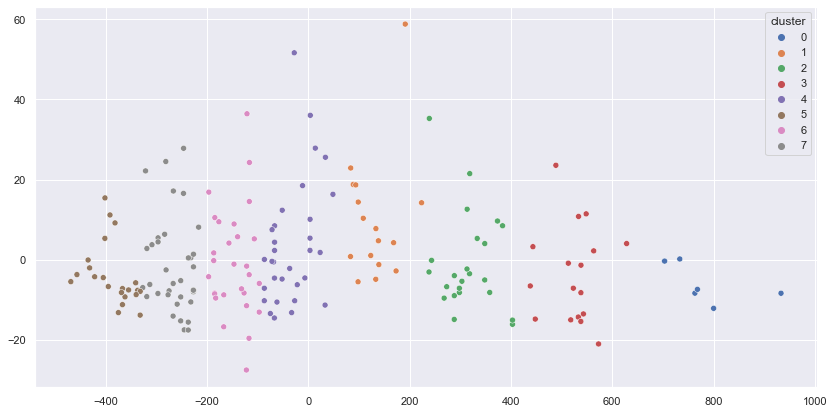

In [9]:
# this affinity propagation implementation incorporates randomness, so we set the seed for the global random number generator to get reproducible results
np.random.seed(seed=42)
wine_data_affinity_propagation = wine_data_pca.copy()
wine_data_affinity_propagation = wine_data_affinity_propagation.rename(columns={"cultivator": "cluster"})
wine_data_affinity_propagation["cluster"] = u1.apply_affinity_propagation(data=wine_data.drop(columns="cultivator"))
u1.plot_points_2d(data=wine_data_affinity_propagation, target_column="cluster", figsize=(14, 7))

<h3 style="color:rgb(0,120,170)">Tasks</h3>
<div class="alert alert-warning">
    <ul>
        <li>Change the number of cluster centers $k$ in the $k$-Means algorithm to different values (than $3$). What do you observe?</li>
        <li>For the t-SNE projection method, you can change a parameter called <i>perplexity</i> - try different numbers and see for yourself how the projection changes. Execute the function twice with the same perplexity and a different random seed. What do you observe?</li>
    </ul>
</div>